In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
from gc_utils import iteration_name, snapshot_name  # type: ignore

In [2]:
simulation = "m12i"

sim_dir = "/Users/z5114326/Documents/simulations/"
data_dir = "/Users/z5114326/Documents/GitHub/gc_kinematics/data/"

fire_dir = sim_dir + simulation + "/" + simulation + "_res7100/"

sim = simulation

proc_file = sim_dir + sim + "/" + sim + "_processed.hdf5"
proc_data = h5py.File(proc_file, "a")  # open processed data file

In [3]:
public_snapshot_fil = data_dir + "external/snapshot_times_public.txt"
with open(public_snapshot_fil) as f:
    content = f.readlines()
    content = content[13:]
snap_pub = ascii.read(content)["index"]

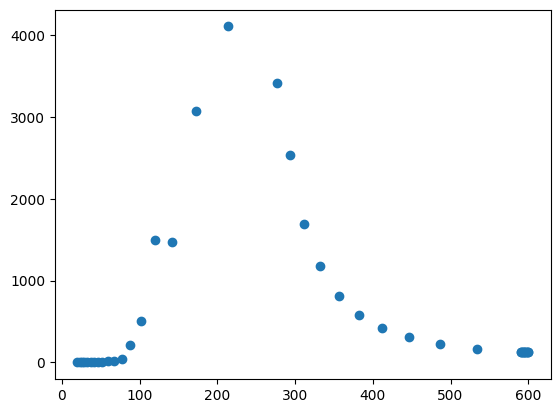

In [19]:
average_dict = {}

for snap in snap_pub:
    snap_id = snapshot_name(snap)
    average_dict[snap_id] = []
    for it in range(0, 101):
        it_id = iteration_name(it)
        group_ids = np.array(proc_data[it_id]["snapshots"][snap_id]["group_id"])
        mask = np.where(group_ids == 0)[0]
        average_dict[snap_id].append(len(mask))

average_num = []
for snap_id in average_dict.keys():
    avg = np.average(average_dict[snap_id])
    average_num.append(avg)

plt.scatter(snap_pub, average_num)

In [22]:
proc_data.close()